In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [5]:
df.drop(columns=['id'], inplace=True)
df['age'] = (df['age'] / 365).astype(int)
df.drop_duplicates(inplace=True)

In [7]:
df = df[(df['height'] >= 100) & (df['height'] <= 250)]
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 200)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 130)]


C:\Users\subra\AppData\Local\Temp\ipykernel_4888\3929772728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=df, palette='coolwarm')


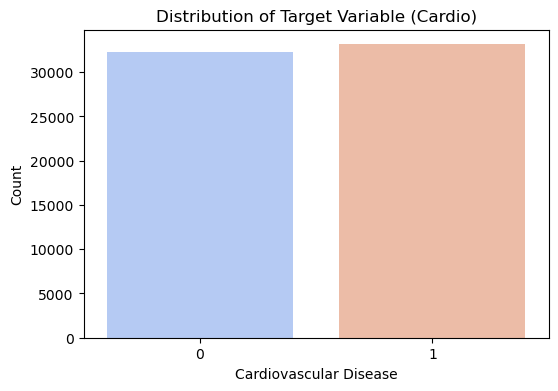

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable (Cardio)")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.show()

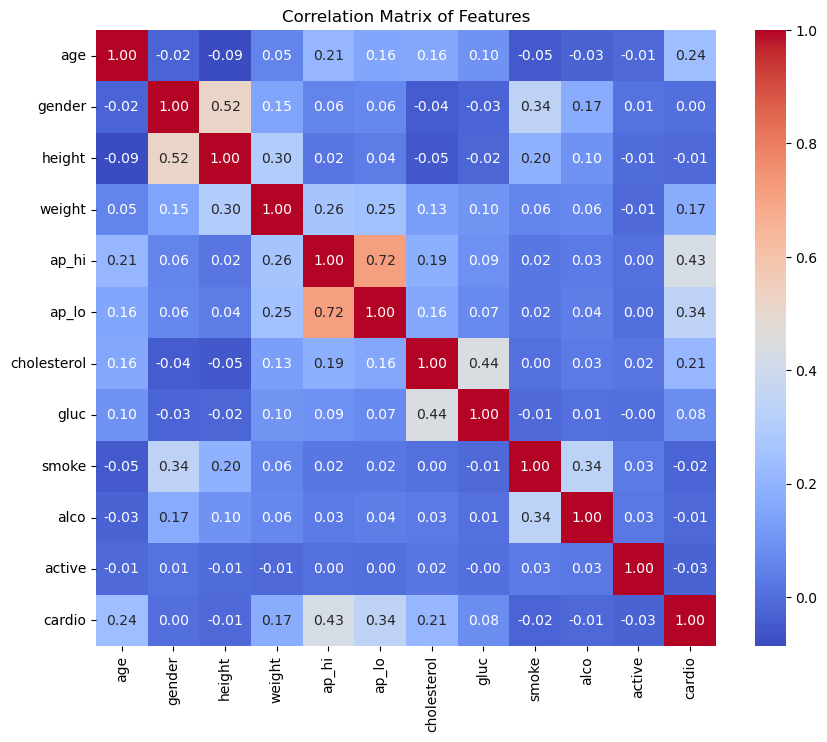

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [15]:
X = df.drop(columns=['cardio'])
y = df['cardio']


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

results = {}

In [25]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"\n{model_name}:")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



SVM:
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6512
           1       0.76      0.68      0.72      6571

    accuracy                           0.73     13083
   macro avg       0.73      0.73      0.73     13083
weighted avg       0.73      0.73      0.73     13083


KNN:
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6512
           1       0.70      0.68      0.69      6571

    accuracy                           0.69     13083
   macro avg       0.69      0.69      0.69     13083
weighted avg       0.69      0.69      0.69     13083


Decision Tree:
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      6512
           1       0.62      0.60      0.61      6571

    accuracy                           0.61     13083
   macro avg       0.61      0.61      0.61     13083
w

In [27]:
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")


Best Model: SVM with Accuracy: 0.73


In [33]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_final_pred = best_model.predict(X_test)

In [34]:
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6512
           1       0.76      0.68      0.72      6571

    accuracy                           0.73     13083
   macro avg       0.73      0.73      0.73     13083
weighted avg       0.73      0.73      0.73     13083

